In [6]:
import os
from os import mkdir
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.io.wavfile import write


In [45]:
#Defining variables

ntokenreps = 10  #how many times the target repeats in a trial
tonedur = 0.05 
minf = 200
maxf = 12800
noct = 6
spectral_density = [1] #tones per octave   
temporal_density = [10] #tones per second
tempi = 0.5 #s, the inter-repeat interval of tokens 
tempilist = [0.5]
tokendur = 0.2 #target duration


fs = 44100 #generate sounds with this fs
fs48 = 48828 #convert to this fs for TDT equipment
maxf48k = fs48/2
trialseed = 888

tokenstartrange=np.linspace(1,1.5, num=6) #range from where I can choose to strat my token
tokenstart=np.random.choice(tokenstartrange)
mintokenstart = 1 
maxtokenstart = 1.5 #first token starts between 1-1.5s into (random) tone cloud
np.random.seed(trialseed)  #command to set the seed
ntrialspercond = 60
stimdb = 85
wrongtotaltime=tokenstart+(tempi*ntokenreps)
totaltime=maxtokenstart+(tempi*ntokenreps)
targetrms = (10**(-94/20))*(10**(stimdb/20)) #convertion of dB to amplitude. the number we would use
targetrms_wav = 0.1 #0.4

timegrid=np.linspace(0,totaltime, num=int(totaltime/(1/(temporal_density[0]))+1))                     


In [42]:
trialct = 0
for s in range(len(spectral_density)):
    specdens = spectral_density[s]
    freq_list = np.logspace(np.log10(minf),np.log10(maxf),specdens*noct+1)
    for t in range(len(temporal_density)):
        for n in range(ntrialspercond):
            for N in range(len(tempilist)):
                trialct = trialct+1
                startt =(maxtokenstart-mintokenstart) + mintokenstart # time of first token start 
                startt_ms = startt*1000
                seqdur = startt+ntokenreps
                

In [43]:
#compute hann envelope (for creating a smooth on and off ramp to sounds)

hanndur = 0.005
thann = np.arange(1/fs, hanndur+1/fs, 1/fs)
ramp = np.cos(2*np.pi*0.5/hanndur*thann)
ttone = np.arange(1/fs, tonedur+1/fs, 1/fs)
env = np.ones(ttone.shape)
env[:len(ramp)] = np.flip(ramp)
env[-len(ramp):] = ramp
env=(env+1)/2
#plt.plot(ttone, env)

ValueError: operands could not be broadcast together with shapes (28,) (221,) 

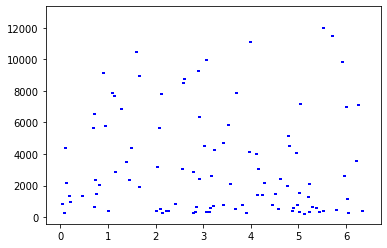

In [44]:
soundmat=np.zeros(int(totaltime*fs))

def grid_creation(timegrid,freq_list):
    for t in range(len(timegrid)-1):     
        for f in range(len(freq_list)-1):
            start_time = timegrid[t]
            end_time = timegrid[t+1]
            ftimetone = np.random.uniform(start_time, end_time)
        
            fstart_time = freq_list[f]
            fend_time = freq_list[f+1]
            ftone = np.random.uniform(fstart_time, fend_time)
            
            amp = np.sin(2*np.pi*ftone*ttone) #make the tone
            amp = amp*env #hanning env already calculated outside
            
            tonestartsamp = int(ftimetone*fs)+1
            toneendsamp = tonestartsamp+len(amp)
            
            soundmat[tonestartsamp:toneendsamp]=soundmat[tonestartsamp:toneendsamp]+amp

            plt.plot([ftimetone, ftimetone + tonedur],[ftone, ftone], color='blue', linewidth=2)
            
    for t in timegrid:
        linetime=plt.axvline(x=t, color='gray', linestyle='--', linewidth=0.5)
    for f in freq_list:
        linefreq=plt.axhline(y=f, color='gray', linestyle='--', linewidth=0.5)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Grid')
    plt.xlim(0, 1)
    plt.ylim(minf, maxf+800)
    plt.show()
    
grid_creation(timegrid,freq_list)

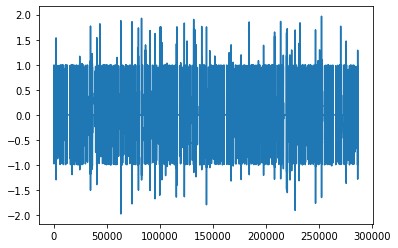

In [128]:
plt.plot(soundmat)

In [5]:
def grid_creation(timegrid,freq_list):
    for t in timegrid:
        linetime=plt.axvline(x=t, color='gray', linestyle='--', linewidth=0.5)
    for f in freq_list:
        linefreq=plt.axhline(y=f, color='gray', linestyle='--', linewidth=0.5)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Grid')
    plt.xlim(0, totaltime)
    plt.ylim(minf, maxf+800)
    plt.show()
    

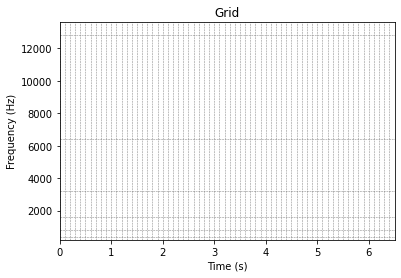

In [6]:
grid_creation(timegrid,freq_list)

In [134]:
#Creating the folder in a specified path
example_num=1
setID= f"tonecloud_{example_num}"
#mkdir(f"C:/Users/Laptop Elitebook/Documents/NEUROCIENCIAS/practicas-tesis/Audios/set_{setID}")


In [140]:
pip install soundfile

  Obtaining dependency information for soundfile from https://files.pythonhosted.org/packages/50/ff/26a4ee48d0b66625a4e4028a055b9f25bc9d7c7b2d17d21a45137621a50d/soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata
   ---------------------------------------- 1.0/1.0 MB 3.2 MB/s eta 0:00:00




[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: c:\python39\python.exe -m pip install --upgrade pip


In [147]:
filename="first_tonecloud"
output_path = f"C:/Users/Laptop Elitebook/Documents/NEUROCIENCIAS/practicas-tesis/Audios/set_{setID}"

def saving_tonecloud (soundmat,fs,output_path,filename):
    import soundfile as sf
    import os
    path_filename = os.path.join(output_path, f"{filename}.wav")
    sf.write(path_filename, soundmat, fs)
    
    print(f"{filename} succesfully saved in {output_path}")
    return path_filename
        


In [148]:
saving_tonecloud (soundmat,fs,output_path,filename)

first_tonecloud succesfully saved in C:/Users/Laptop Elitebook/Documents/NEUROCIENCIAS/practicas-tesis/Audios/set_tonecloud_1


'C:/Users/Laptop Elitebook/Documents/NEUROCIENCIAS/practicas-tesis/Audios/set_tonecloud_1\\first_tonecloud.wav'

In [124]:
soundmat[tonestartsamp:toneendsamp].shape

(221,)

In [116]:

soundmat[1,tonestartsamp:toneendsamp]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [122]:
a=soundmat[tonestartsamp]
a

0.0

In [105]:
soundmat.shape

(1, 286650)

In [101]:
tonestartsamp = int(ftimetone*fs)+1
toneendsamp = tonestartsamp+len(amp)

In [102]:
print(tonestartsamp,toneendsamp)

45881 46102


In [68]:
amp

array([ 3.99965999e-02,  7.99170156e-02,  1.19685234e-01,  1.59225586e-01,
        1.98462913e-01,  2.37322741e-01,  2.75731441e-01,  3.13616402e-01,
        3.50906187e-01,  3.87530697e-01,  4.23421324e-01,  4.58511106e-01,
        4.92734875e-01,  5.26029398e-01,  5.58333520e-01,  5.89588299e-01,
        6.19737128e-01,  6.48725864e-01,  6.76502942e-01,  7.03019484e-01,
        7.28229405e-01,  7.52089508e-01,  7.74559574e-01,  7.95602442e-01,
        8.15184088e-01,  8.33273687e-01,  8.49843675e-01,  8.64869797e-01,
        8.78331155e-01,  8.90210236e-01,  9.00492944e-01,  9.09168615e-01,
        9.16230025e-01,  9.21673399e-01,  9.25498395e-01,  9.27708093e-01,
        9.28308974e-01,  9.27310885e-01,  9.24726998e-01,  9.20573770e-01,
        9.14870878e-01,  9.07641166e-01,  8.98910568e-01,  8.88708034e-01,
        8.77065446e-01,  8.64017526e-01,  8.49601738e-01,  8.33858187e-01,
        8.16829509e-01,  7.98560755e-01,  7.79099270e-01,  7.58494573e-01,
        7.36798220e-01,  

In [71]:
len(amp)

221

In [55]:
ftimetone

0.09221500124509842

In [56]:
start_time = timegrid[0]
end_time = timegrid[0+1]
fstart_time = freq_list[0]
fend_time = freq_list[0+1]
ftone = np.random.uniform(fstart_time, fend_time)
ftimetone = np.random.uniform(start_time, end_time)
tonestartsamp = int(ftimetone*fs)+1
amp = np.sin(2*np.pi*ftone*ttone) #make the tone
amp = amp*env #hanning env already calculated outside
toneendsamp = int(ftimetone+len(amp))
soundmat[tonestartsamp,toneendsamp]=soundmat[tonestartsamp:toneendsamp]+amp

ValueError: operands could not be broadcast together with shapes (0,286650) (221,) 

In [17]:
tonestartsamp

1360

In [18]:
toneendsamp

221

In [41]:
soundmat[tonestartsamp,toneendsamp]

IndexError: index 4184 is out of bounds for axis 0 with size 1

In [25]:
soundmat[tonestartsamp:toneendsamp]

array([], shape=(0, 286650), dtype=int32)

In [49]:
print(soundmat[tonestartsamp],soundmat[toneendsamp])


IndexError: index 4067 is out of bounds for axis 0 with size 1

In [66]:
soundmat.shape

(1, 286650)

In [215]:
tonestartsamp

NameError: name 'tonestartsamp' is not defined

In [202]:
int(totaltime*fs)

286650

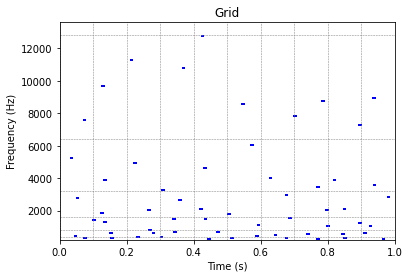

In [192]:
def grid_creation(timegrid,freq_list):
    for t in range(len(timegrid)-1):     
        for f in range(len(freq_list)-1):
            start_time = timegrid[t]
            end_time = timegrid[t+1]
            ftimetone = np.random.uniform(start_time, end_time)
        
            fstart_time = freq_list[f]
            fend_time = freq_list[f+1]
            ftone = np.random.uniform(fstart_time, fend_time)
            
            amp = np.sin(2*np.pi*ftone*ttone) #make the tone
            amp = amp*env #hanning env already calculated outside

            plt.plot([ftimetone, ftimetone + tonedur],[ftone, ftone], color='blue', linewidth=2)
            
    for t in timegrid:
        linetime=plt.axvline(x=t, color='gray', linestyle='--', linewidth=0.5)
    for f in freq_list:
        linefreq=plt.axhline(y=f, color='gray', linestyle='--', linewidth=0.5)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Grid')
    plt.xlim(0, 1)
    plt.ylim(minf, maxf+800)
    plt.show()
grid_creation(timegrid,freq_list)

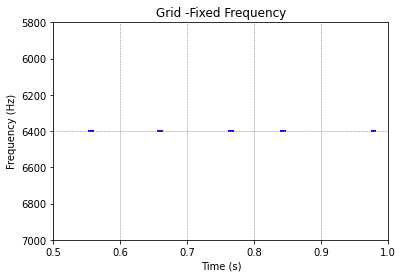

In [184]:
fixed_freq=freq_list[5]

trialtimetones=[]
t=0
def grid_creation_freqfixed(timegrid,freq_list):
    for t in range(len(timegrid)-1): 
        start_time = timegrid[t]
        end_time = timegrid[t+1]  
        ftimetone = np.random.uniform(start_time, end_time)
        trialtones.append(start_time)
            
        plt.plot([ftimetone, ftimetone + tonedur], [fixed_freq, fixed_freq], color='blue', linewidth=2)
            
    for t in timegrid:
        linetime=plt.axvline(x=t, color='gray', linestyle='--', linewidth=0.5)
    for f in freq_list:
        linefreq=plt.axhline(y=f, color='gray', linestyle='--', linewidth=0.5)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Grid -Fixed Frequency')
    plt.xlim(0.5, 1)
    plt.ylim(7000, 5800)
    plt.show()
grid_creation_freqfixed(timegrid,freq_list)


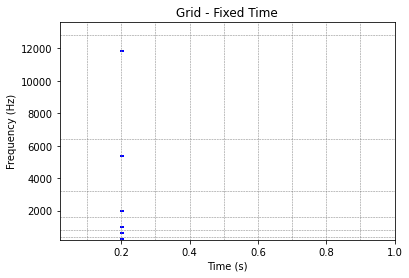

In [185]:
fixed_time=timegrid[2]
def grid_creation_timefixed(timegrid,freq_list):
    for f in range(len(freq_list)-1):
        fstart_time = freq_list[f]
        fend_time = freq_list[f+1]
        ftone = np.random.uniform(fstart_time, fend_time)
        amp = np.sin(2*np.pi*ftone*ttone) #make the tone
        amp = amp*env #hanning env already calculated outside
            
        plt.plot([fixed_time,fixed_time+0.005], [ftone,ftone], color='blue', linewidth=2)
            
    for t in timegrid:
        linetime=plt.axvline(x=t, color='gray', linestyle='--', linewidth=0.5)
    for f in freq_list:
        linefreq=plt.axhline(y=f, color='gray', linestyle='--', linewidth=0.5)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Grid - Fixed Time')
    plt.xlim(0.02, 1)
    plt.ylim(minf, maxf+800)
    plt.show()
grid_creation_timefixed(timegrid,freq_list)

In [ ]:
np.zeros()

### Intentos fallidos y borradores:
(No están en orden cronológico)

In [33]:
freq_list #así se ve freq_list

array([  200.,   400.,   800.,  1600.,  3200.,  6400., 12800.])

In [130]:
timegrid #así se ve timegrid

array([0.        , 0.1001503 , 0.2003006 , 0.3004509 , 0.4006012 ,
       0.5007515 , 0.6009018 , 0.7010521 , 0.8012024 , 0.90135271,
       1.00150301, 1.10165331, 1.20180361, 1.30195391, 1.40210421,
       1.50225451, 1.60240481, 1.70255511, 1.80270541, 1.90285571,
       2.00300601, 2.10315631, 2.20330661, 2.30345691, 2.40360721,
       2.50375752, 2.60390782, 2.70405812, 2.80420842, 2.90435872,
       3.00450902, 3.10465932, 3.20480962, 3.30495992, 3.40511022,
       3.50526052, 3.60541082, 3.70556112, 3.80571142, 3.90586172,
       4.00601202, 4.10616232, 4.20631263, 4.30646293, 4.40661323,
       4.50676353, 4.60691383, 4.70706413, 4.80721443, 4.90736473,
       5.00751503, 5.10766533, 5.20781563, 5.30796593, 5.40811623,
       5.50826653, 5.60841683, 5.70856713, 5.80871743, 5.90886774,
       6.00901804])

In [73]:
def grid_creation(timegrid,freq_list):
    for s in range(spectral_density[0]):
        for td in range(temporal_density[0]):
            for t in timegrid:
                linetime=plt.axvline(x=t, color='gray', linestyle='--', linewidth=0.5)
                td=td+1
                ftone = np.random.uniform(minf, maxf) #pick a random tone frequency between minf and maxf
                ftimetone=np.random.uniform(0, timegrid)
                amp = np.sin(2*np.pi*ftone*ttone) #make the tone
                amp = amp*env #hanning env already calculated outside
                plt.scatter(td,ftone)
            for f in freq_list:
                linefreq=plt.axhline(y=f, color='gray', linestyle='--', linewidth=0.5)
    
            plt.xlabel('Time (s)')
            plt.ylabel('Frequency (Hz)')
            plt.title('Grid')
            plt.xlim(0, totaltime)
            plt.ylim(minf, maxf+800)
            plt.show()

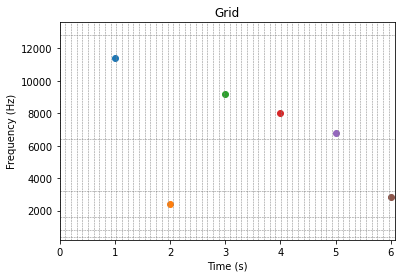

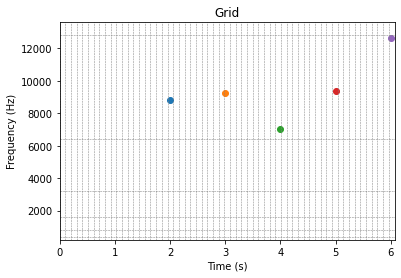

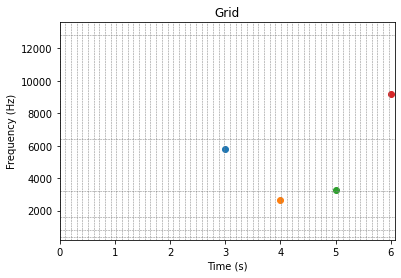

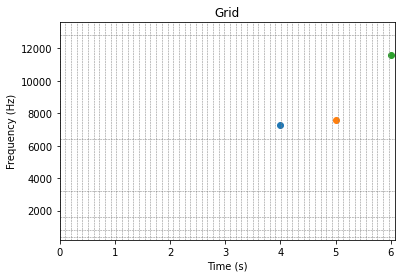

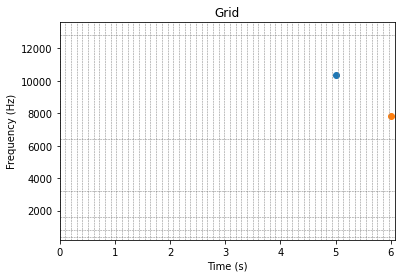

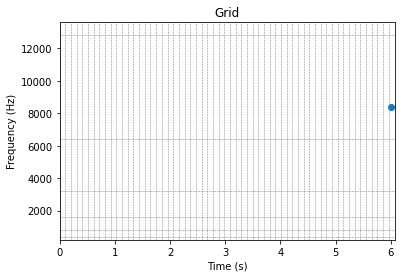

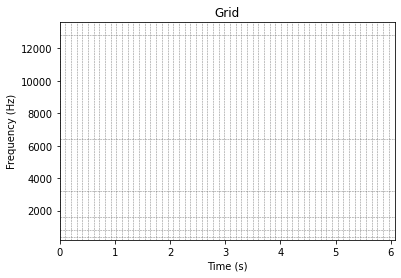

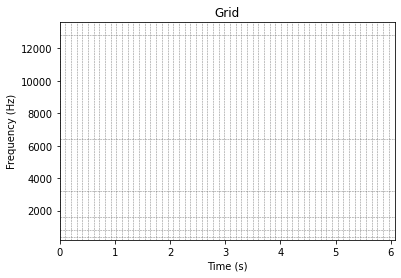

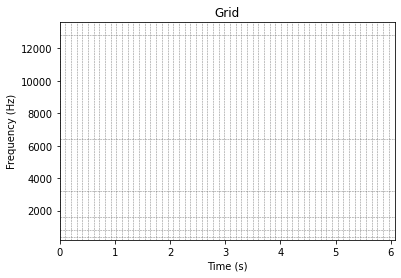

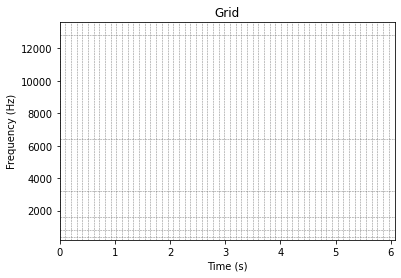

In [74]:
grid_creation(timegrid,freq_list)

In [80]:
ftimetones = []  
td=0
def grid_creation(timegrid,freq_list):
    for t in range(int(totaltime)): 
        start_time = t  
        end_time = t + 1  

        for i in range(temporal_density[0]):  
            ftimetone = np.random.uniform(start_time, end_time)  
                 
        for s in range(spectral_density[0]):
                linetime=plt.axvline(x=t, color='gray', linestyle='--', linewidth=0.5)
                ftone = np.random.uniform(minf, maxf) #pick a random tone frequency between minf and maxf
                amp = np.sin(2*np.pi*ftone*ttone) #make the tone
                amp = amp*env #hanning env already calculated outside
                plt.scatter(ftimetone,ftone)
                for f in freq_list:
                    linefreq=plt.axhline(y=f, color='gray', linestyle='--', linewidth=0.5)
    
                plt.xlabel('Time (s)')
                plt.ylabel('Frequency (Hz)')
                plt.title('Grid')
                plt.xlim(0, totaltime)
                plt.ylim(minf, maxf+800)
                plt.show()

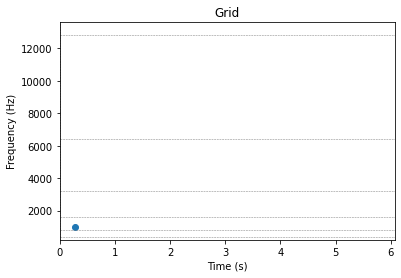

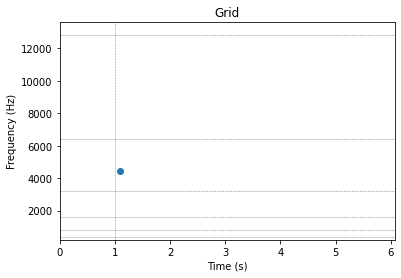

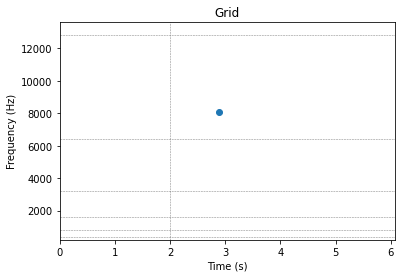

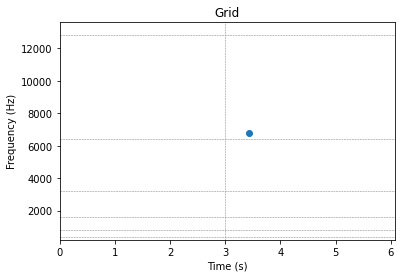

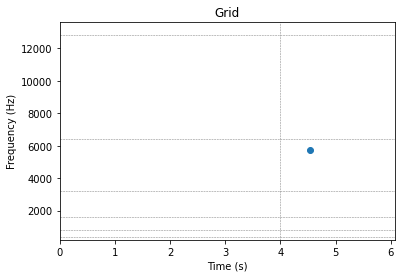

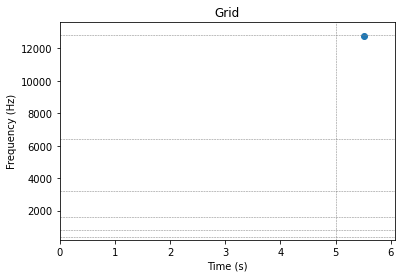

In [81]:
grid_creation(timegrid,freq_list)


In [114]:
len(timegrid)

60

In [123]:
timegrid

array([0.        , 0.1028158 , 0.2056316 , 0.3084474 , 0.4112632 ,
       0.51407901, 0.61689481, 0.71971061, 0.82252641, 0.92534221,
       1.02815801, 1.13097381, 1.23378961, 1.33660541, 1.43942122,
       1.54223702, 1.64505282, 1.74786862, 1.85068442, 1.95350022,
       2.05631602, 2.15913182, 2.26194762, 2.36476343, 2.46757923,
       2.57039503, 2.67321083, 2.77602663, 2.87884243, 2.98165823,
       3.08447403, 3.18728983, 3.29010563, 3.39292144, 3.49573724,
       3.59855304, 3.70136884, 3.80418464, 3.90700044, 4.00981624,
       4.11263204, 4.21544784, 4.31826365, 4.42107945, 4.52389525,
       4.62671105, 4.72952685, 4.83234265, 4.93515845, 5.03797425,
       5.14079005, 5.24360586, 5.34642166, 5.44923746, 5.55205326,
       5.65486906, 5.75768486, 5.86050066, 5.96331646, 6.06613226])

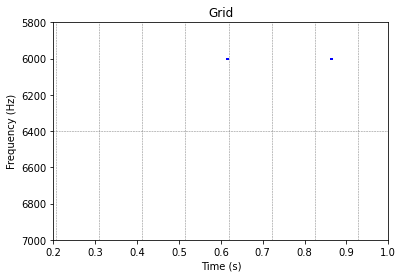

In [125]:
def grid_creation_ffixed(timegrid,freq_list):
    for t in range(len(timegrid)-1): 
        start_time = t
        end_time = t+1

        for i in range(temporal_density[0]):  
            ftimetone = np.random.uniform(start_time, end_time)
            
            plt.plot([ftimetone, ftimetone + tonedur], [6000, 6000], color='blue', linewidth=2)
            
    for t in timegrid:
        linetime=plt.axvline(x=t, color='gray', linestyle='--', linewidth=0.5)
    for f in freq_list:
        linefreq=plt.axhline(y=f, color='gray', linestyle='--', linewidth=0.5)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Grid')
    plt.xlim(0.2, 1)
    plt.ylim(7000, 5800)
    plt.show()
grid_creation_ffixed(timegrid,freq_list)

In [126]:
timegrid

array([0.        , 0.10307712, 0.20615424, 0.30923137, 0.41230849,
       0.51538561, 0.61846273, 0.72153985, 0.82461698, 0.9276941 ,
       1.03077122, 1.13384834, 1.23692546, 1.34000259, 1.44307971,
       1.54615683, 1.64923395, 1.75231107, 1.8553882 , 1.95846532,
       2.06154244, 2.16461956, 2.26769668, 2.37077381, 2.47385093,
       2.57692805, 2.68000517, 2.78308229, 2.88615942, 2.98923654,
       3.09231366, 3.19539078, 3.2984679 , 3.40154503, 3.50462215,
       3.60769927, 3.71077639, 3.81385351, 3.91693064, 4.02000776,
       4.12308488, 4.226162  , 4.32923912, 4.43231625, 4.53539337,
       4.63847049, 4.74154761, 4.84462473, 4.94770186, 5.05077898,
       5.1538561 , 5.25693322, 5.36001034, 5.46308747, 5.56616459,
       5.66924171, 5.77231883, 5.87539595, 5.97847308, 6.0815502 ,
       6.18462732, 6.28770444, 6.39078156])

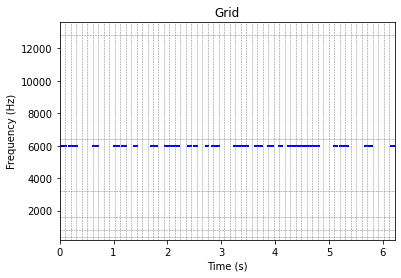

In [11]:
grid_creation_ffixed(timegrid,freq_list)

In [75]:
def grid_creation_t(timegrid,freq_list):
    for t in range(int(totaltime)): 
        start_time = t  
        end_time = t + 1  

        for i in range(temporal_density[0]):  
            ftimetone = np.random.uniform(start_time, end_time)
            plt.scatter(ftimetone,600)
            
    for t in timegrid:
        linetime=plt.axvline(x=t, color='gray', linestyle='--', linewidth=0.5)
    for f in freq_list:
        linefreq=plt.axhline(y=f, color='gray', linestyle='--', linewidth=0.5)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Grid')
    plt.xlim(0, totaltime)
    plt.ylim(minf, maxf+800)
    plt.show()

In [ ]:
def grid_creation(timegrid,freq_list):
    for td in range(temporal_density[0]):
        for s in range(spectral_density[0]):
                td=td+1
                ftone = np.random.uniform(minf, maxf) #pick a random tone frequency between minf and maxf
                ftimetone=np.random.uniform(0, timegrid)
                amp = np.sin(2*np.pi*ftone*ttone) #make the tone
                amp = amp*env #hanning env already calculated outside
                plt.scatter(td,ftone)
        for f in freq_list:
            linefreq=plt.axhline(y=f, color='gray', linestyle='--', linewidth=0.5)
    
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.title('Grid')
        plt.xlim(0, totaltime)
        plt.ylim(minf, maxf+800)
        plt.show()

In [55]:
ftimetones=[]
time=0
for t in range(int(temporal_density[0]*totaltime)):
    for i in range(temporal_density[0]):
        ftimetone=np.random.uniform(0, totaltime)
        ftimetones.append(ftimetone)
        
        

In [21]:
ftimetones = []  

for t in range(int(totaltime)): 
    start_time = t  
    end_time = t + 1  

    for i in range(temporal_density[0]):  
        ftimetone = np.random.uniform(start_time, end_time)  
        ftimetones.append(ftimetone)  

print(ftimetones)

[0.8746844079883702, 0.2677773557125669, 0.28448631315506523, 0.027195176237154284, 0.385699284822557, 0.44032308190500347, 0.4161966031956361, 0.5799528372699668, 0.3662295328140369, 0.3493414663609782, 1.1669068706863623, 1.131852857424184, 1.161308738330991, 1.2102767762956455, 1.5834007445310618, 1.8317984562824403, 1.0152022332748318, 1.4983105831351222, 1.690234391689628, 1.6014576448610756, 2.608499732938063, 2.6124200003115017, 2.98272273809991, 2.15832489589502, 2.7937408305105005, 2.2556224246136853, 2.068479912759321, 2.0004160662586807, 2.054079108977743, 2.6952899602720235, 3.3868469585243943, 3.2881464538518, 3.9687748075525406, 3.452602399757453, 3.8990411925911803, 3.631717823273557, 3.5988139964869417, 3.576094121854113, 3.4128946058277987, 3.5462517199497765, 4.471268056893366, 4.9121863962545556, 4.209987667515014, 4.635223476179962, 4.616198260643526, 4.473220401397325, 4.539355673334283, 4.238741536553418, 4.536740958109805, 4.50121341207096, 5.412683830487397, 5.6

In [22]:
len(ftimetones)

60

In [33]:
ftimetone=np.random.uniform(0, timegrid)
ftimetone

array([0.        , 0.07183239, 0.12108094, 0.17903891, 0.12067538,
       0.48560671, 0.38147877, 0.51125067, 0.0587691 , 0.27762847,
       0.06233391, 0.03300629, 0.5538293 , 0.84328641, 0.840885  ,
       1.19456566, 0.15844045, 1.72119333, 0.88282739, 0.28883695,
       1.34665292, 0.45354467, 0.82469741, 1.96020407, 0.92038718,
       1.38514473, 0.90291202, 2.03594254, 1.77489901, 2.86711138,
       2.28559622, 0.38199684, 3.20278849, 1.76319104, 3.25716151,
       0.93642415, 0.16316485, 0.73997124, 1.78694962, 1.78280832,
       1.43398305, 4.13980446, 0.15324854, 0.29317391, 1.5954257 ,
       0.94001139, 4.4325264 , 0.96198592, 2.94593482, 0.88444471,
       2.47178946, 2.23672054, 1.71099874, 2.00094044, 0.31447585,
       2.19879858, 4.91337426, 0.87109194, 2.47311488, 5.55993692,
       3.84814324])

ValueError: x and y must be the same size

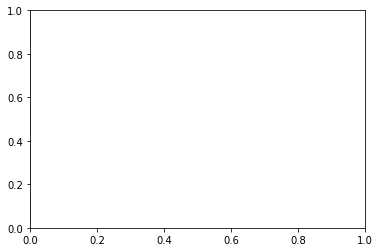

In [30]:
grid_creation(timegrid,freq_list)

In [ ]:
def tones(timegrid, freq_list, temporal_density, spectral_density):
    

In [ ]:
timetones = []  
freqtones = []
for g in timegrid:
    for f in freq_list:
        linetime=plt.axvline(x=g, color='gray', linestyle='--', linewidth=0.5)
        linefreq=plt.axhline(y=f, color='gray', linestyle='--', linewidth=0.5)
        for t in range(temporal_density[0]):
            for s in range(spectral_density[0]):
                t=timetones
                ftone = np.random.uniform(minf, maxf) #pick a random tone frequency between minf and maxf
                amp = np.sin(2*np.pi*ftone*ttone) #make the tone
                amp = amp*env #hanning env already calculated outside
                timetones.append(t)  
                freqtones.append(ftone)
                    
for t, f in zip(timetones, freqtones):
    plt.plot([t], [f], 'bo')  

plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Grid')
plt.xlim(0, totaltime)
plt.ylim(minf, maxf+800)
plt.show()

In [ ]:
timetones

In [69]:
tones

[array([2.35202666e-06, 4.62251049e-06, 6.05925710e-05, ...,
        7.88778941e-05, 6.91200619e-06, 4.81987181e-06]),
 array([ 5.54913468e-06,  9.98038551e-06,  1.11605840e-04, ...,
        -1.12317353e-04, -1.22211865e-05, -9.50026329e-06]),
 array([2.59278522e-06, 5.07612808e-06, 6.61046160e-05, ...,
        9.73103427e-05, 1.19407713e-05, 1.25648923e-05]),
 array([ 1.19267378e-05,  8.13348901e-06, -5.74186941e-05, ...,
        -1.14179509e-04, -4.31010958e-06,  9.74774394e-06]),
 array([ 4.88404883e-06,  9.01528900e-06,  1.05808942e-04, ...,
        -3.74221092e-05, -8.45197163e-06, -1.14430358e-05]),
 array([ 1.24069458e-05,  5.18538303e-06, -9.21546930e-05, ...,
        -4.40771719e-05,  1.04217553e-05,  9.25331790e-06]),
 array([5.95510641e-06, 1.05166447e-05, 1.13550588e-04, ...,
        1.06190194e-04, 8.23027839e-06, 2.73526089e-06]),
 array([3.94985625e-06, 7.50711229e-06, 9.28605756e-05, ...,
        2.11205686e-06, 4.17219819e-06, 7.69501532e-06]),
 array([ 1.14827767e-05,

In [66]:
for g in timegrid:
    # Para cada valor de g en la cuadrícula de tiempo
    for f in freq_list:
        # Genera una cantidad de tonos basada en las densidades establecidas
        for s in range(spectral_density):  # Ya no es necesario usar índice
            for t in range(temporal_density):  # Ya no es necesario usar índice
                # Genera una frecuencia aleatoria entre minf y maxf
                ftone = np.random.uniform(minf, maxf)
                # Calcula la amplitud de ese tono
                amp = np.sin(2 * np.pi * ftone * ttone)
                amp = amp * env  # Aplica la envolvente predefinida
                # Dibuja el tono en la gráfica
                plt.scatter(g, ftone, color='blue', marker='o', s=20)

# Etiquetas y visualización
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Random Tones with Spectral and Temporal Density')
plt.xlim(0, totaltime)
plt.ylim(minf, maxf + 800)

# Mostrar la gráfica con tonos aleatorios
plt.show()


TypeError: 'list' object cannot be interpreted as an integer

In [48]:
i=0
f=0
t=0
for i in range(temporal_density[0],spectral_density[0]):
    i=i+1
    for f in range(len(freq_list)):
        f=f+1
        for t in range(len(timegrid)):
            t=t+1
            ftone = np.random.uniform(minf, maxf) #pick a random tone frequency between minf and maxf
            amp = np.sin(2*np.pi*ftone*ttone) #make the tone
            amp = amp*env #hanning env already calculated outside
            for t in timegrid:
                linetime=plt.axvline(x=t, color='gray', linestyle='--', linewidth=0.5)
    
            for f in freq_list:
                linefreq=plt.axhline(y=f, color='gray', linestyle='--', linewidth=0.5)

            plt.xlabel('Time (s)')
            plt.ylabel('Frequency (Hz)')
            plt.title('Grid')
            plt.xlim(0, totaltime)
            plt.ylim(minf, maxf+800)
            plt.show()
                   
                   
        
    


In [16]:
for s in range(len(spectral_density)):
    specdens = spectral_density[s]
    freq_list = np.logspace(np.log10(minf),np.log10(maxf),specdens*noct+1)
    for t in range(len(temporal_density)):
        for n in range(ntrialspercond):
            for N in range(len(tempi)):
                trialct = trialct+1
                startt =(maxtokenstart-mintokenstart) + mintokenstart # time of first token start 
                startt_ms = startt*1000
                seqdur = startt+ntokenreps
                
     
                
                #generating pure tones
                #ftone = np.random.uniform(minf, maxf) #pick a random tone frequency between minf and maxf
                #amp = np.sin(2*np.pi*ftone*ttone) #make the tone
                #amp = amp*env #hanning env already calculated outside
                #wav_filename = f"{output_path}/trial_{trialct}_freq_{int(ftone)}_Hz.wav"
                #write(wav_filename, fs, amp.astype(np.float32))
                #txt_filename = f"{output_path}/trial_{trialct}_freq_{int(ftone)}.txt"
                #np.savetxt(txt_filename, amp, fmt='%0.6f')


In [8]:
i=0
while i<=tokendur:
    

token=

4

In [32]:
totaltime

6.410821643286573

In [33]:
len(freq_list)

31

In [34]:
time_freq=(totaltime+1),len(freq_list)
time_freq

(7.410821643286573, 31)

In [91]:
freq_list

array([  200.        ,   237.841423  ,   282.84271247,   336.3585661 ,
         400.        ,   475.682846  ,   565.68542495,   672.7171322 ,
         800.        ,   951.365692  ,  1131.3708499 ,  1345.43426441,
        1600.        ,  1902.731384  ,  2262.7416998 ,  2690.86852881,
        3200.        ,  3805.46276801,  4525.48339959,  5381.73705762,
        6400.        ,  7610.92553602,  9050.96679919, 10763.47411525,
       12800.        ])

In [43]:
for i in range(0,7):
    tokenstartrange=np.linspace(1,1.5, num=500) #range from where I can choose to strat my token
    tokenstart=np.random.choice(tokenstartrange)
    
    

In [49]:
octavas=[]
for i in range(0, len(freq_list), 5):
    octava = freq_list[i:i+4]
    octavas.append(octava)
octavas

[array([200.        , 229.739671  , 263.90158215, 303.1433133 ]),
 array([400.        , 459.479342  , 527.80316431, 606.2866266 ]),
 array([ 800.        ,  918.958684  , 1055.60632862, 1212.57325321]),
 array([1600.        , 1837.917368  , 2111.21265724, 2425.14650642]),
 array([3200.        , 3675.83473599, 4222.42531447, 4850.29301283]),
 array([6400.        , 7351.66947198, 8444.85062895, 9700.58602567]),
 array([12800.])]

In [51]:
octavas[0]

array([200.        , 229.739671  , 263.90158215, 303.1433133 ])

In [50]:
soundmat=np.zeros(time_freq)
soundmat

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
for i in range():
    while 

In [127]:
freq_list

array([  200.        ,   237.841423  ,   282.84271247,   336.3585661 ,
         400.        ,   475.682846  ,   565.68542495,   672.7171322 ,
         800.        ,   951.365692  ,  1131.3708499 ,  1345.43426441,
        1600.        ,  1902.731384  ,  2262.7416998 ,  2690.86852881,
        3200.        ,  3805.46276801,  4525.48339959,  5381.73705762,
        6400.        ,  7610.92553602,  9050.96679919, 10763.47411525,
       12800.        ])

In [37]:
octaves = []
grids = []
for f in range(0, len(freq_list)-1, 4):
    octava_min = freq_list[f]  
    octava_max = freq_list[f+4] if f+4 < len(freq_list) else freq_list[-1]  
    grid = np.linspace(octava_min, octava_max, spectral_density[0], endpoint=False)
    octaves.append((octava_min, octava_max))  
    grids.append(grid)  

In [47]:
octaves

[(200.00000000000003, 348.22022531844965),
 (348.22022531844965, 606.2866266041592),
 (606.2866266041592, 1055.6063286183164),
 (1055.6063286183164, 1837.9173679952573),
 (1837.9173679952573, 3200.0000000000023),
 (3200.0000000000023, 5571.523605095198),
 (5571.523605095198, 9700.586025666553),
 (9700.586025666553, 12800.000000000013)]

In [40]:
i = freq_list[0] 
j = 0
tones = []

for f in range(spectral_density[0]):
    while j < len(octaves):  
        if i in octaves[j]:
            tone = np.random.uniform(octaves[j][0], octaves[j][-1])
        tones.append(tone)  
        i += 1  
        j += 1  


In [46]:
for j in range(len(octavas)):
    for f in range(spectral_density[0]):  
        tone = np.random.uniform(octavas[j][0], octavas[j][-1])
        tones.append(tone)  
        print(tone)
        


274.87300306723
219.6667889879619
244.55992747366037
207.9781482032896
250.3216371083465
419.19713137930864
511.39308527686137
354.8235753157737
499.6748517761622
495.8934444501441
763.5299160337152
790.136615968926
773.2035789015442
620.3312925084872
627.3607460589027
1503.224177607564
1367.8367371589893
1289.1182853764412
1109.6571235882984
1088.1302891256898
1954.8258667274783
2421.107873888655
1865.9706713040837
1995.3505033316194
1889.5200090483422
3646.8449903225364
4383.219097955251
4386.685692716883
3718.852058415869
4266.399027879268
6972.167003049871
6574.17205716355
6581.0025364735475
6715.7626606911435
5846.39110854829
10354.627207792886
11618.985965757112
12570.473818773726
10810.651249987659
12494.158766576951


In [28]:
freq_list

array([  200.        ,   237.841423  ,   282.84271247,   336.3585661 ,
         400.        ,   475.682846  ,   565.68542495,   672.7171322 ,
         800.        ,   951.365692  ,  1131.3708499 ,  1345.43426441,
        1600.        ,  1902.731384  ,  2262.7416998 ,  2690.86852881,
        3200.        ,  3805.46276801,  4525.48339959,  5381.73705762,
        6400.        ,  7610.92553602,  9050.96679919, 10763.47411525,
       12800.        ])

In [36]:
while freq_list()

2.7990383196104363